The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


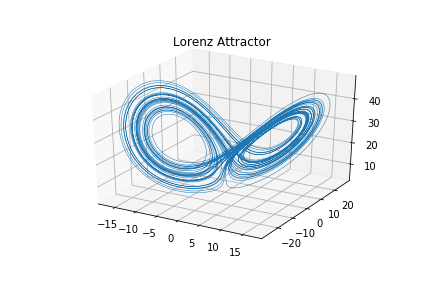

In [113]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib widget

def lorenz(xyz, *, s=5, r=28, b=2.667):
    _, x, y, z = xyz
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return np.array([1, x_dot, y_dot, z_dot])

dt = 0.01
num_steps = 30000

xyzs = np.empty((num_steps + 1, 4))  # Need one more for the initial values
xyzs[0] = (0, 0., 1., 1.05)  # Set initial values
# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    xyzs[i + 1] = xyzs[i] + lorenz(xyzs[i]) * dt

# Plot
ax = plt.figure().add_subplot(projection='3d')

xyz_coords = np.empty((num_steps+1, 3))
for i in range(num_steps+1):
    xyz_coords[i] = xyzs[i][1:]

#print(xyz_coords)
    
ax.plot(*xyz_coords[5000:10000].T, lw=0.5)
#ax.set_xlabel("X Axis")
#ax.set_ylabel("Y Axis")
#ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

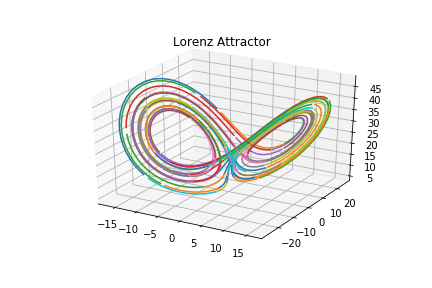

In [114]:
from traj2sim import *
import math
from mpl_toolkits import mplot3d
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

xyzs = xyzs[7500:10000]
xyz_coords = xyz_coords[7500:10000]
num_steps = len(xyzs)
#num_steps=num_steps-5000

traj_list = []
#num_steps=250
length = 25
i = 0
while i+length<num_steps:
    traj_list.append(xyzs[i:i+length])
    i = i+int(1*length)

ax = plt.figure().add_subplot(projection='3d')

for i in range(0,100):
    ax.plot(*xyz_coords[i*length:(i+1)*length].T)
#ax.set_xlabel("X Axis")
#ax.set_ylabel("Y Axis")
#ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

In [115]:
print('Trajectory shape before embedding:')
print(traj_list[0].shape)
#print(np.linalg.norm(traj_list[0][:,1:], axis=1))

def embedding(xyz):
    return np.hstack((xyz, np.power(xyz/np.linalg.norm(xyz, axis=1, keepdims=True), 2*np.ones(xyz.shape)), 
                      np.power(xyz/np.linalg.norm(xyz, axis=1, keepdims=True), 3*np.ones(xyz.shape))))

                     
A = np.random.randn(3, 9)
#print(A)
A = [[ 0.36956572, -0.56530295, -0.08434743, -1.27003323, -0.34177907, -1.31266121, 0.08831102,  0.36965217,  0.83838318],
 [-1.46928237,  2.41508164, 2.59267909, -.69745742,-1.63944946,-0.05751269, -0.12781221,  0.19239181, 1.40852378],
 [ 0.18748471, -0.53227022,0.66637963, 0.92152638, 0.37343253, -0.14106446, -1.64379584, -0.58575294,  0.27286669]]

def embed_and_project(xyz, project=True):
    if project == True:
        return np.matmul(A, embedding(xyz).T).T
    else:
        return embedding(xyz)

project = True
    
tlist_new = [0.0 for i in range(len(traj_list))]
for i in range(len(traj_list)):
    tlist_new[i] = np.hstack((np.reshape(traj_list[i][:,0],(traj_list[i][:,0].shape[0],1)), embed_and_project(traj_list[i][:,1:], project)))
traj_list = tlist_new
if project == True:
    print('Trajectory shape after embedding and projecting:')
else:
    print('Trajectory shape after embedding:')

print(traj_list[0].shape)
#print(np.linalg.norm(traj_list[0][:,1:], axis=1))

Trajectory shape before embedding:
(25, 4)
Trajectory shape after embedding and projecting:
(25, 4)


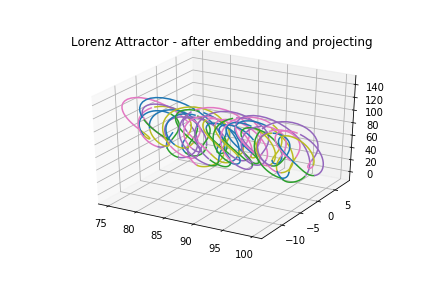

In [116]:
if project == True:
    ax = plt.figure().add_subplot(projection='3d')

    for i in range(0,len(traj_list)):
        ax.plot(*traj_list[i].T)
    ax.set_title("Lorenz Attractor - after embedding and projecting")
    plt.show()

In [117]:
t2s = Traj2Sim()

load=True

if project == False:
    if load == False:
        t2s.set_trajectories(traj_list)
        t2s.compute_mssd(verbose=False)
        t2s.save_bifilt(filename='lorenz_hd.npy')
    if load == True:
        t2s.load_bifilt(filename='lorenz_hd.npy')

if project == True:
    if load == False:
        t2s.set_trajectories(traj_list)
        t2s.compute_mssd(verbose=False)
        t2s.save_bifilt(filename='lorenz_projected_hd.npy')
    if load == True:
        t2s.load_bifilt(filename='lorenz_projected_hd.npy')

|████████████████████████████████████████| 4851/4851 [100%] in 3:41.9 (21.86/s)                █▆▄ 29/4851 [1%] in 1s (20.7/s, eta: 3:53)            (22.7/s, eta: 3:22)         (22.2/s, eta: 3:16)    in 23s (22.2/s, eta: 3:16)      in 27s (22.1/s, eta: 3:13)     (22.0/s, eta: 3:12)   (21.9/s, eta: 3:07)    757/4851 [16%] in 34s (21.9/s, eta: 3:07)             ▃▅▇ 864/4851 [18%] in 39s (21.9/s, eta: 3:02)    ▄▆█ 869/4851 [18%] in 40s (21.9/s, eta: 3:02)   ▄▆█ 957/4851 [20%] in 44s (21.9/s, eta: 2:58)     in 50s (22.0/s, eta: 2:51)    ▇▇▅ 1151/4851 [24%] in 52s (21.9/s, eta: 2:49)   in 56s (21.9/s, eta: 2:45)   in 57s (21.9/s, eta: 2:44)  ▇▇▅ 1295/4851 [27%] in 59s (21.9/s, eta: 2:42)  (21.9/s, eta: 2:39) in 1:03 (21.9/s, eta: 2:39)  1402/4851 [29%] in 1:04 (21.9/s, eta: 2:38)  in 1:07 (21.9/s, eta: 2:35)   in 1:13 (21.9/s, eta: 2:28) in 1:15 (21.9/s, eta: 2:27) (21.9/s, eta: 2:25) in 1:18 (21.9/s, eta: 2:23) in 1:20 (21.9/s, eta: 2:22)  ▅▃▁ 1816/4851 [37%] in 1:23 (21.9/s, eta: 2:19)  (

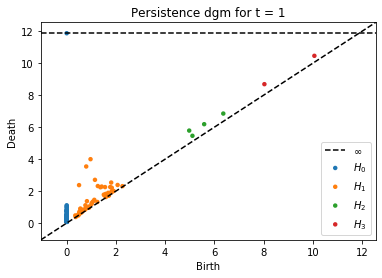

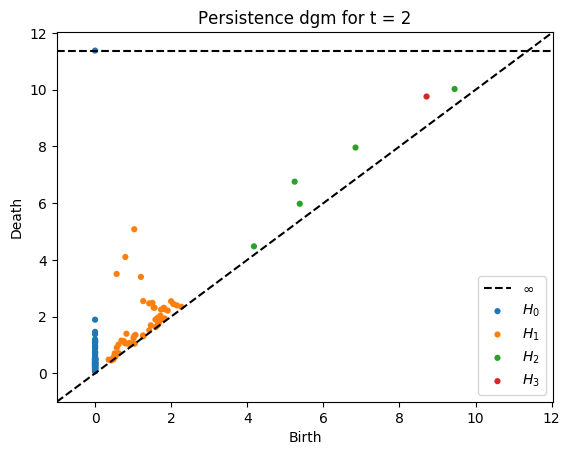

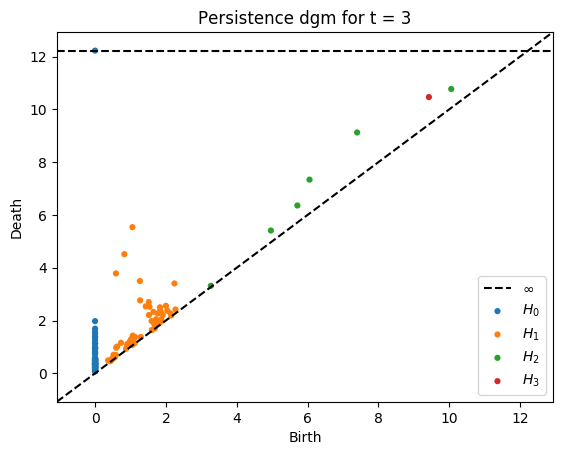

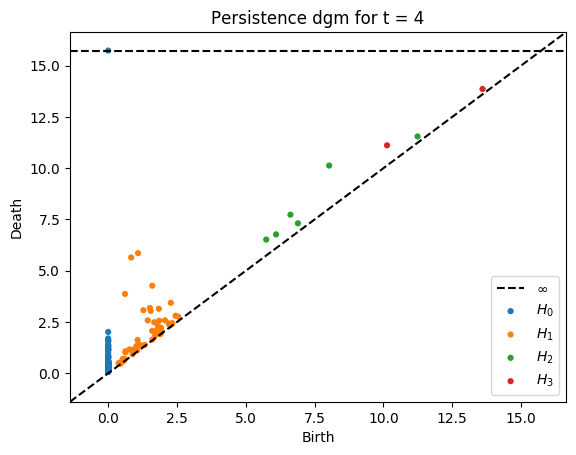

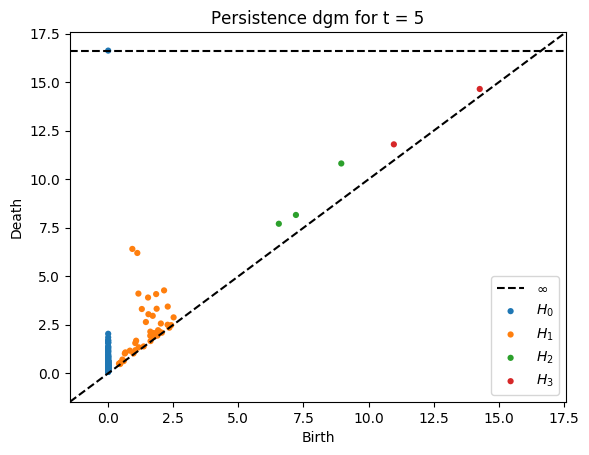

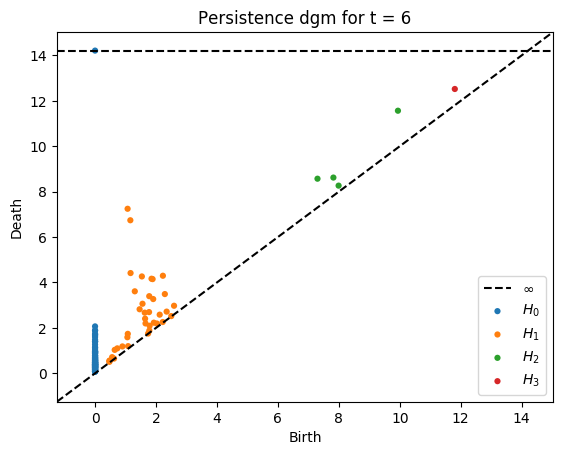

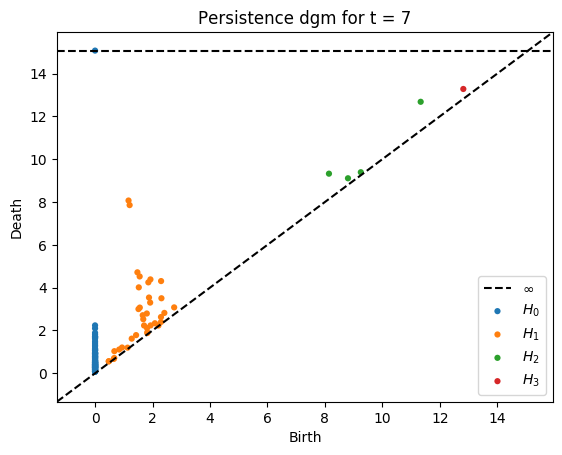

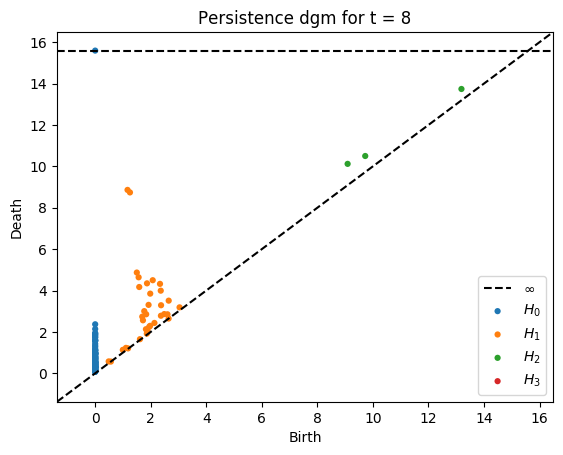

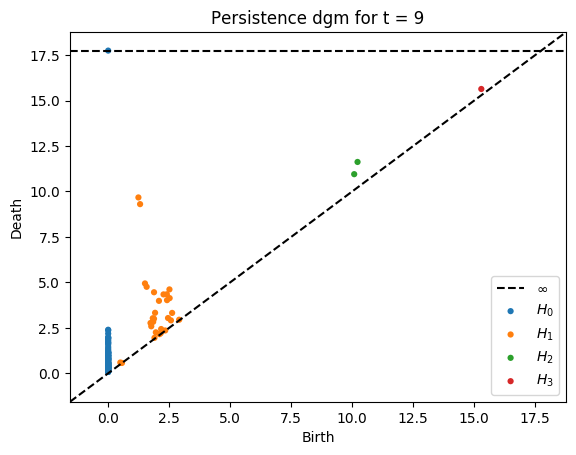

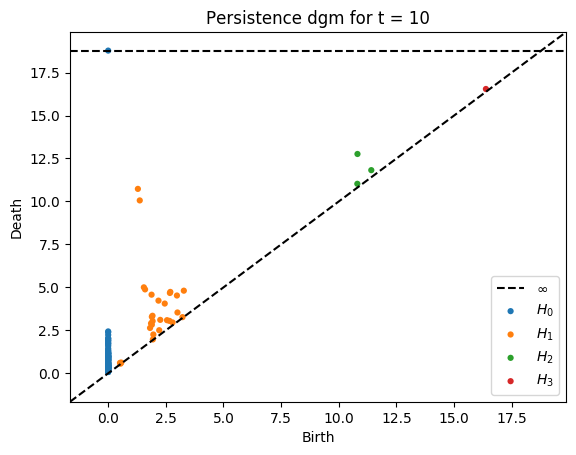

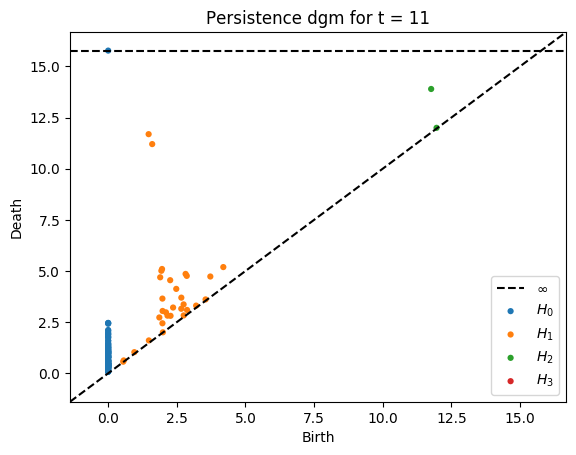

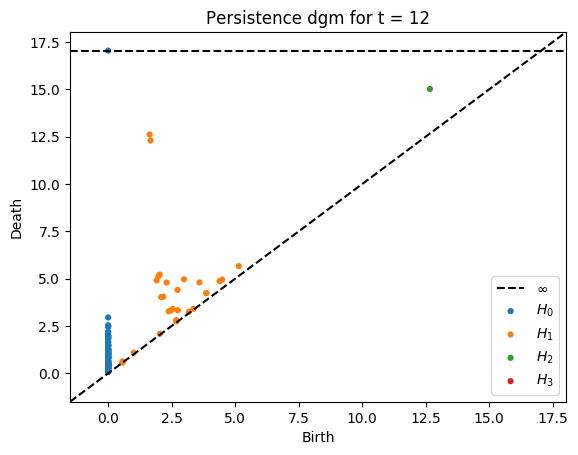

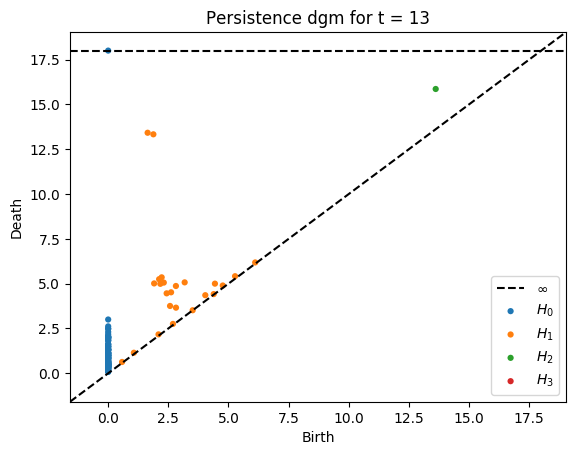

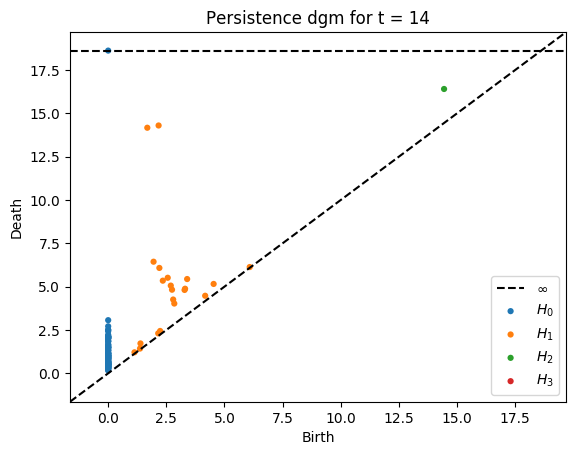

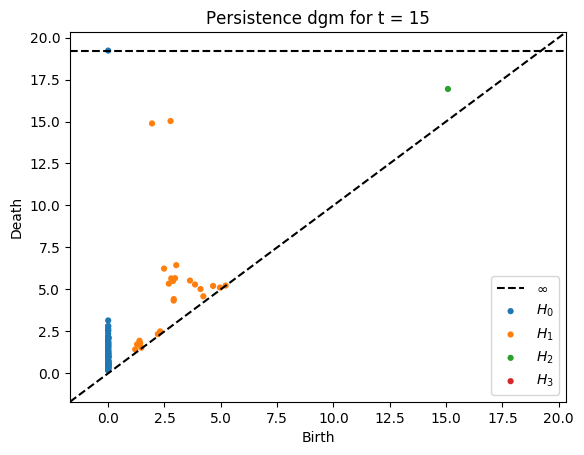

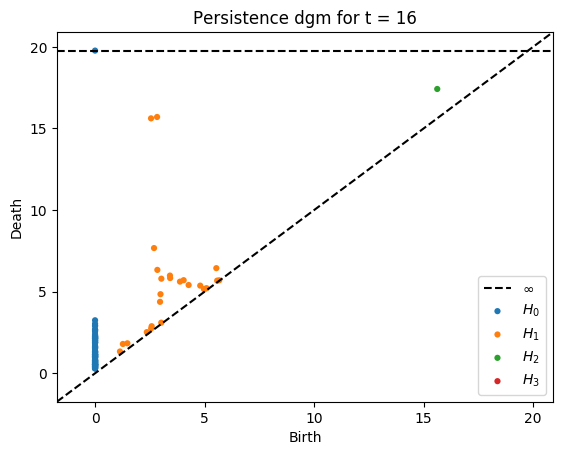

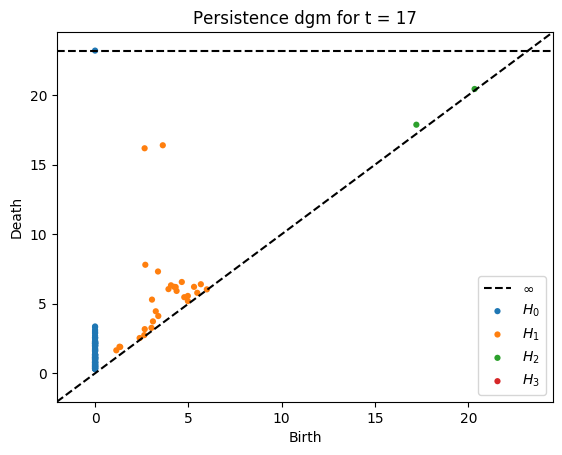

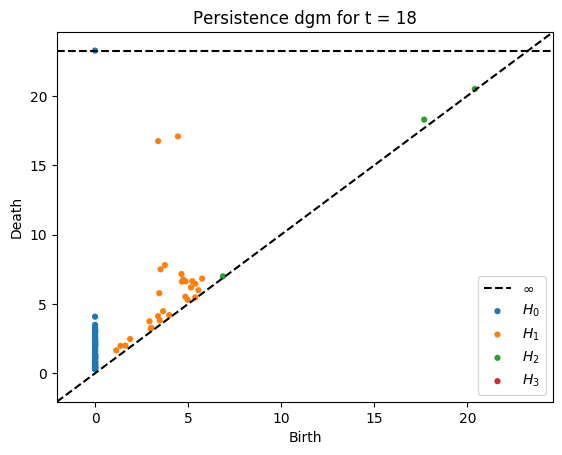

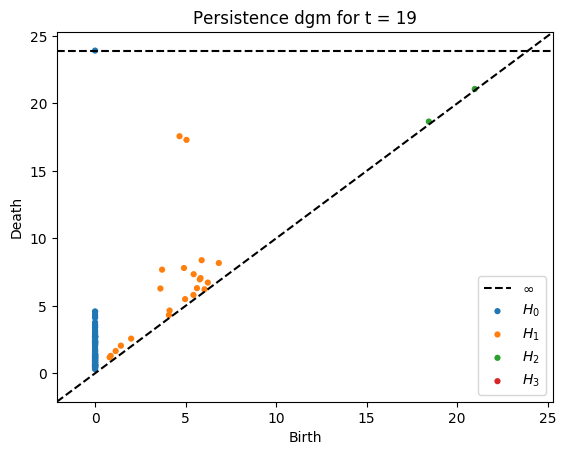

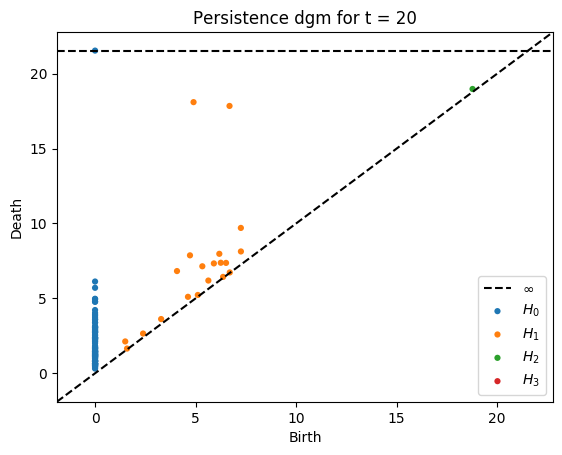

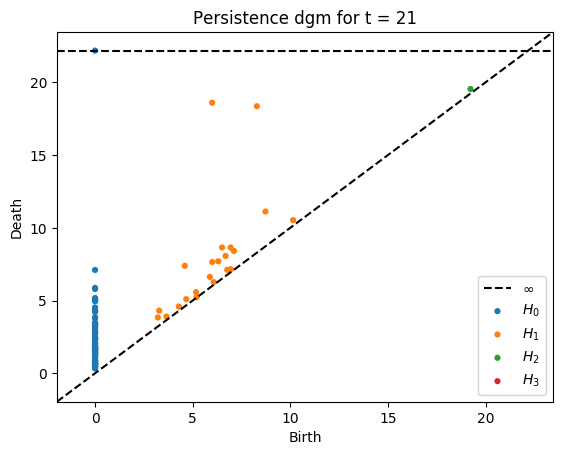

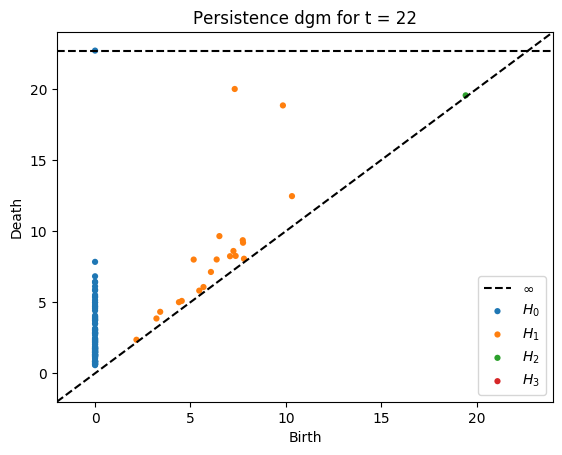

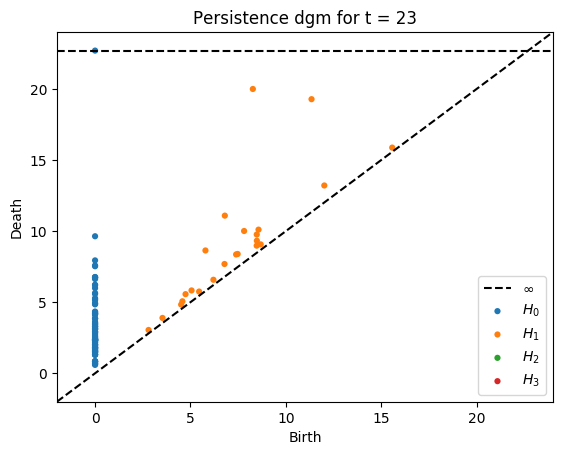

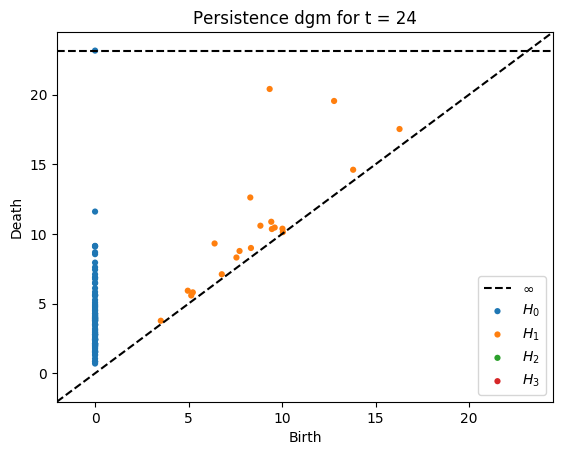

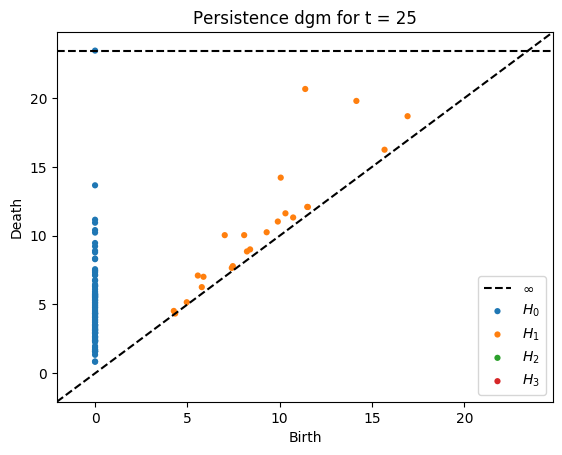

In [107]:
from ripser import ripser
from sklearn import datasets
from persim import plot_diagrams
%matplotlib inline

if project == False:
    for i in range(t2s.bifilt.shape[0]):
        dgms = ripser(t2s.bifilt[i,:,:], distance_matrix=True, maxdim=3)['dgms']
        plt.clf()
        plt.title('Persistence dgm for t = '+ str(i+1))
        plot_diagrams(dgms, show = True)

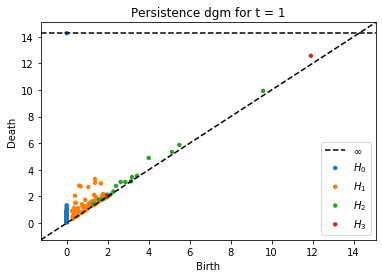

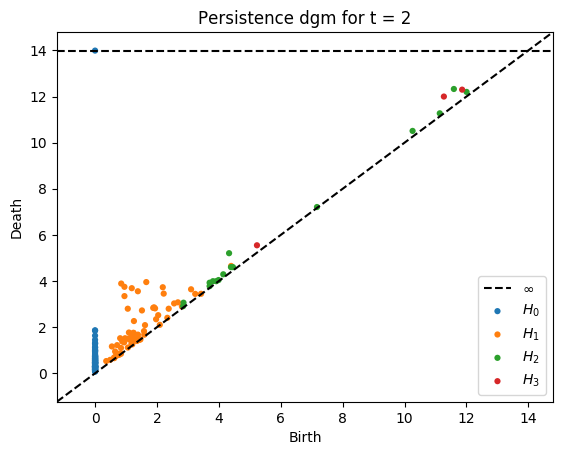

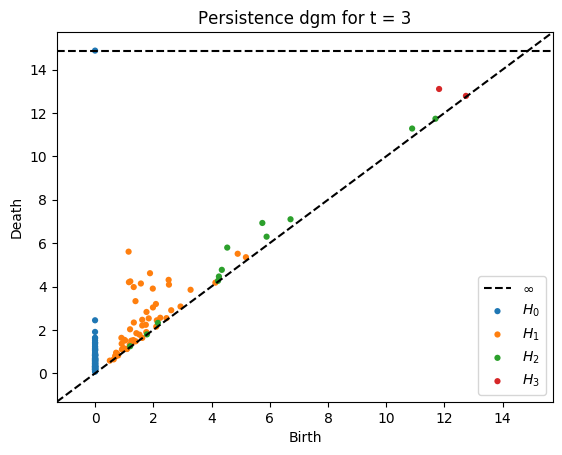

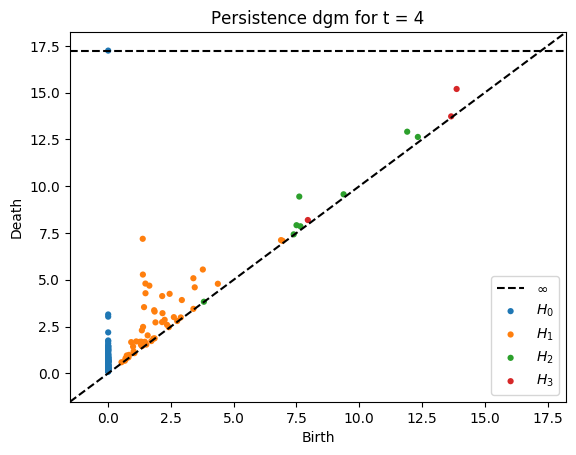

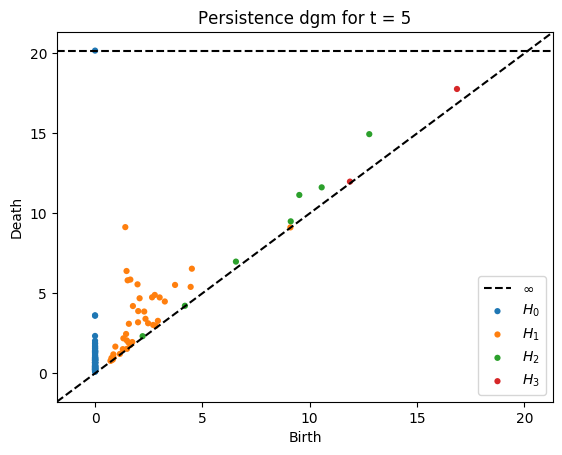

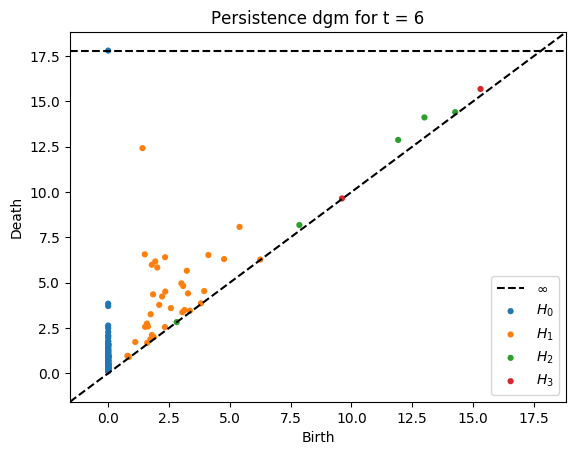

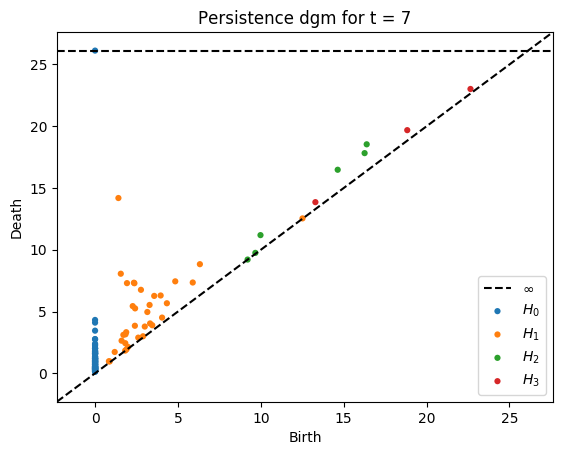

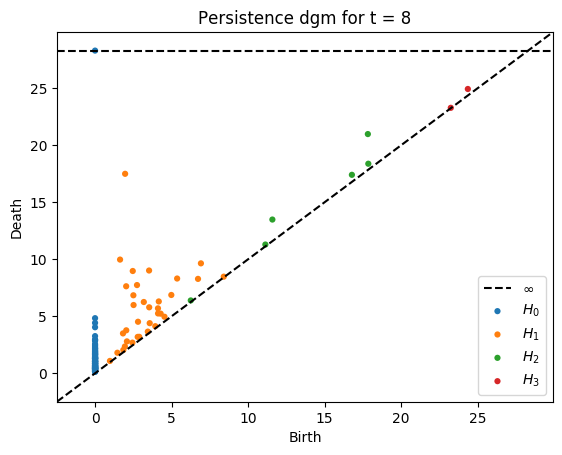

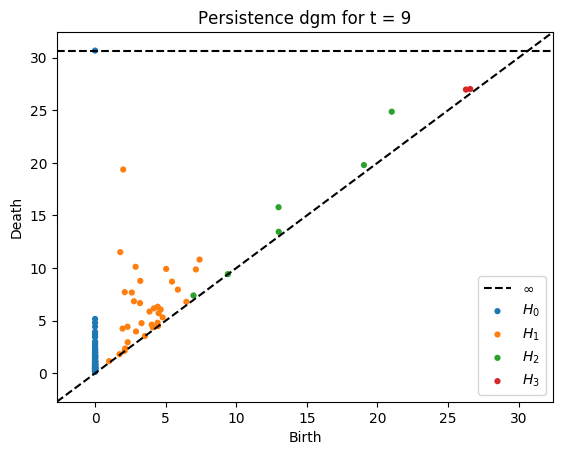

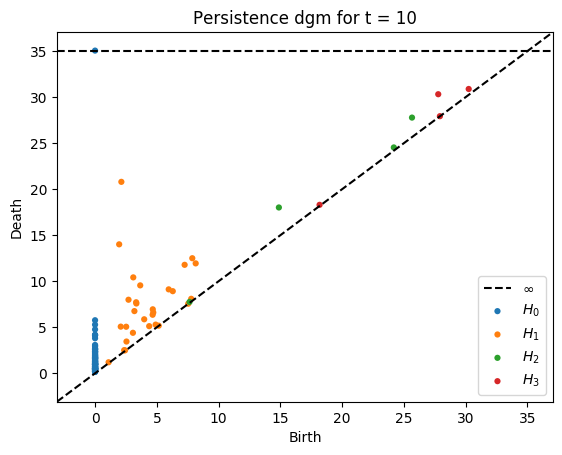

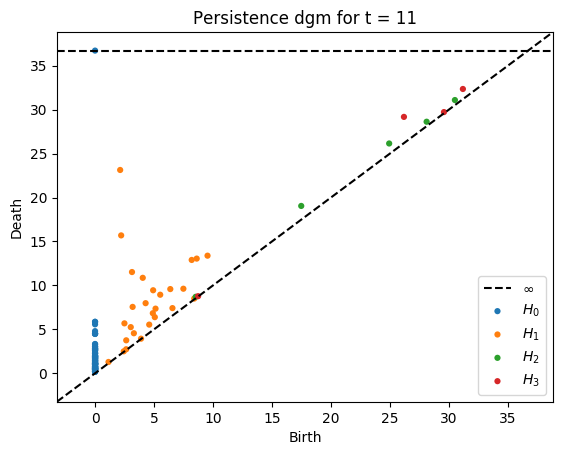

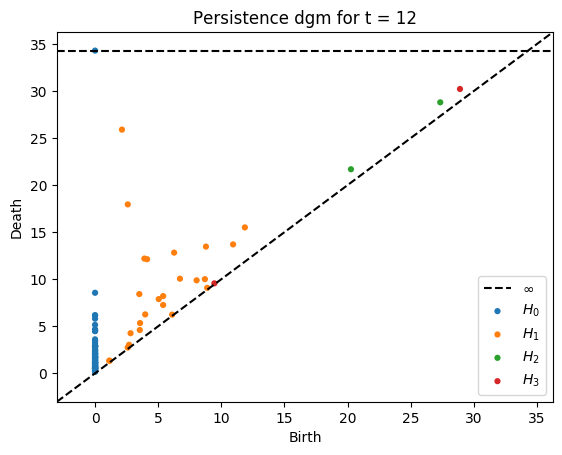

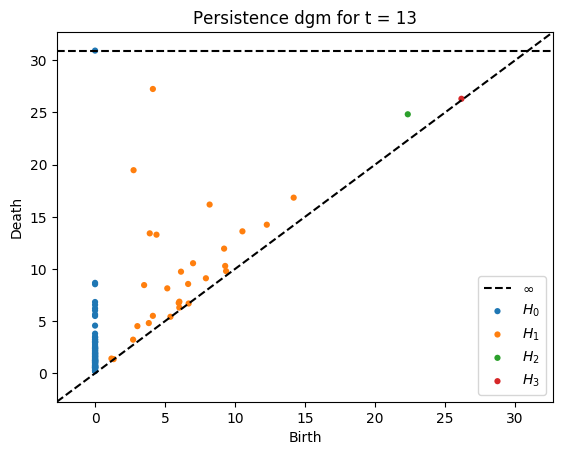

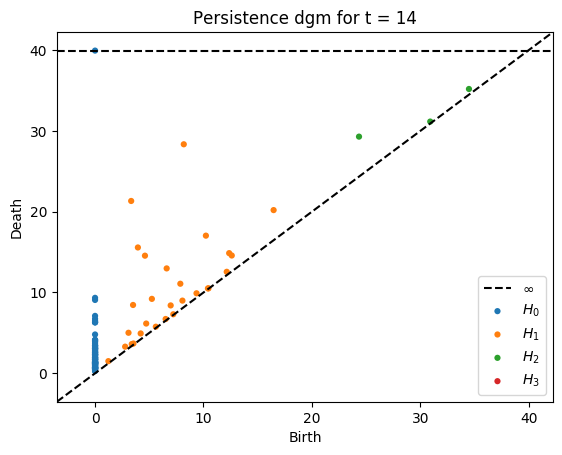

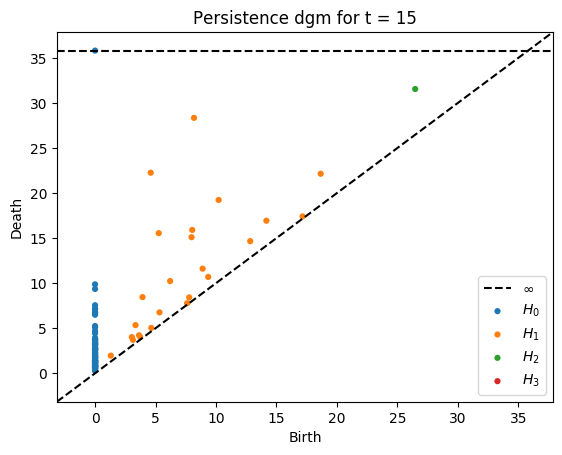

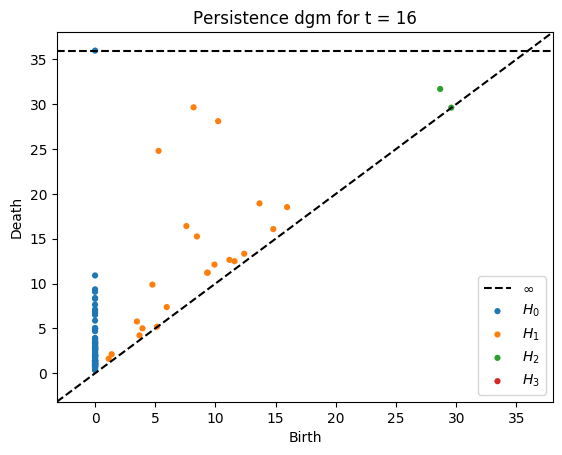

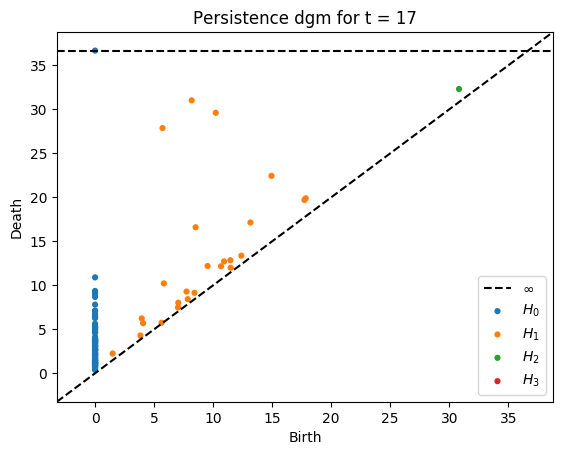

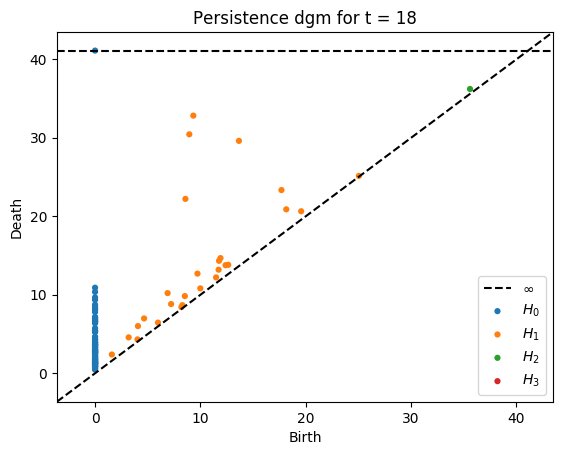

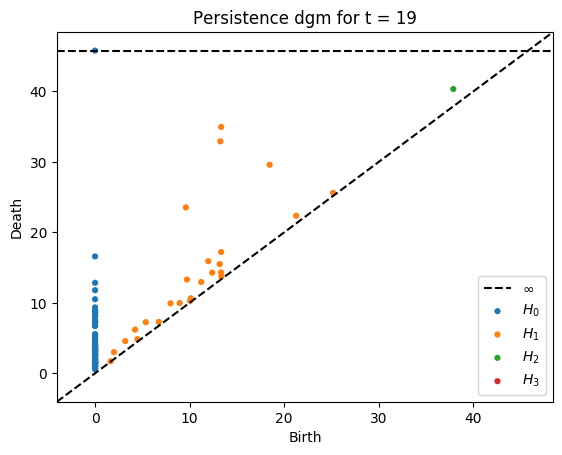

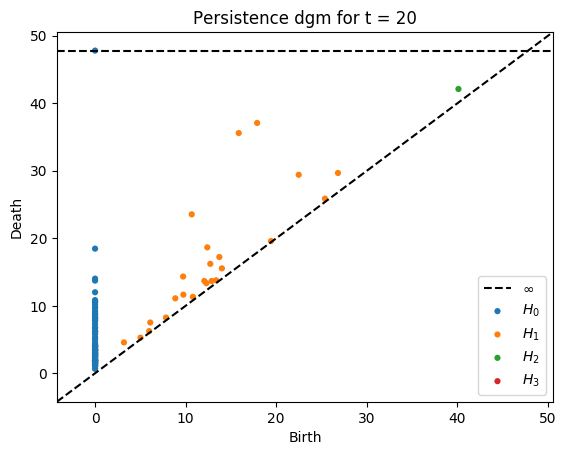

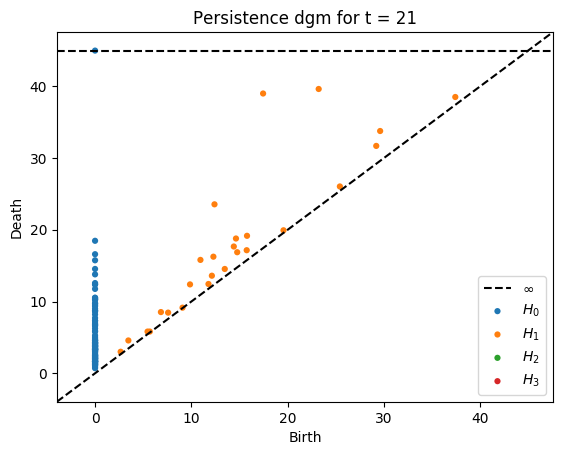

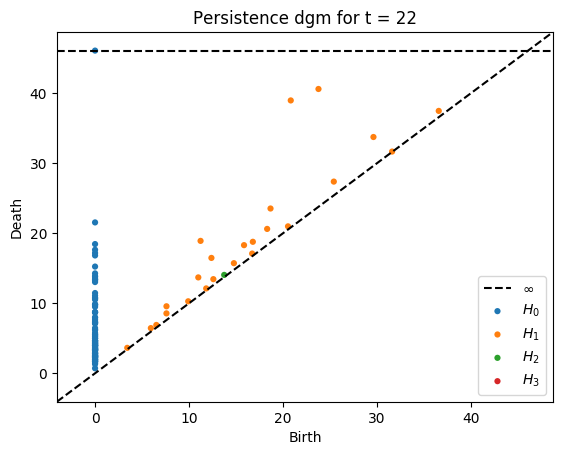

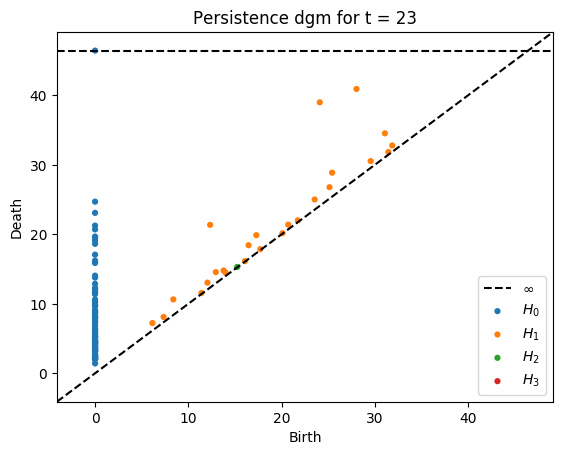

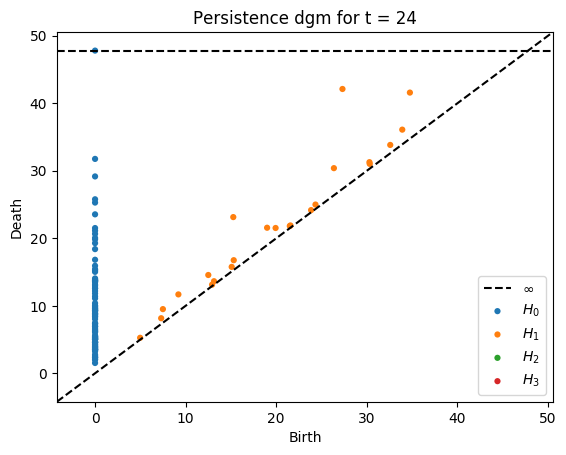

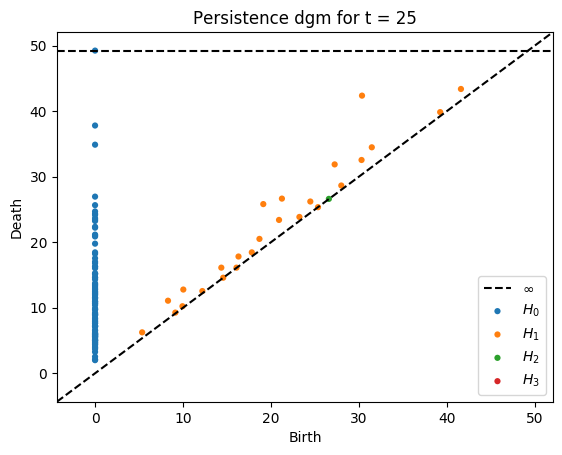

In [118]:
from ripser import ripser
from sklearn import datasets
from persim import plot_diagrams
%matplotlib inline

if project == True:
    for i in range(t2s.bifilt.shape[0]):
        dgms = ripser(t2s.bifilt[i,:,:], distance_matrix=True, maxdim=3)['dgms']
        plt.clf()
        plt.title('Persistence dgm for t = '+ str(i+1))
        plot_diagrams(dgms, show = True)